Katiely Feitosa de Lacerda - 12777100

## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sneeze1.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,6,0,1,1,80.0,43.279066
1,5,1,0,0,46.0,61.571050
2,0,0,1,0,20.0,24.281061
3,18,0,0,1,27.0,59.588401
4,5,0,0,0,48.0,32.727172
...,...,...,...,...,...,...
1195,72,0,0,1,51.0,110.470695
1196,6,0,0,0,65.0,45.704558
1197,8,0,0,0,59.0,20.381291
1198,31,0,0,1,20.0,31.376729


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [3]:
df.dtypes

,0
nsneeze,int64
alcohol,int64
antihist,int64
smoker,int64
age,float64
pollen,float64


In [4]:
df.describe()

,nsneeze,alcohol,antihist,smoker,age,pollen
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,17.093333,0.299167,0.251667,0.189167,40.342500,59.566507
std,27.537245,0.458084,0.434152,0.391804,13.324469,30.430699
min,0.000000,0.000000,0.000000,0.000000,18.000000,6.576282
25%,5.000000,0.000000,0.000000,0.000000,31.000000,38.017155
50%,10.000000,0.000000,0.000000,0.000000,40.000000,54.753465
75%,19.000000,1.000000,1.000000,0.000000,49.000000,74.416409
max,512.000000,1.000000,1.000000,1.000000,80.000000,202.922690


espirro tem alta relação com pollen, assim como o alcohol

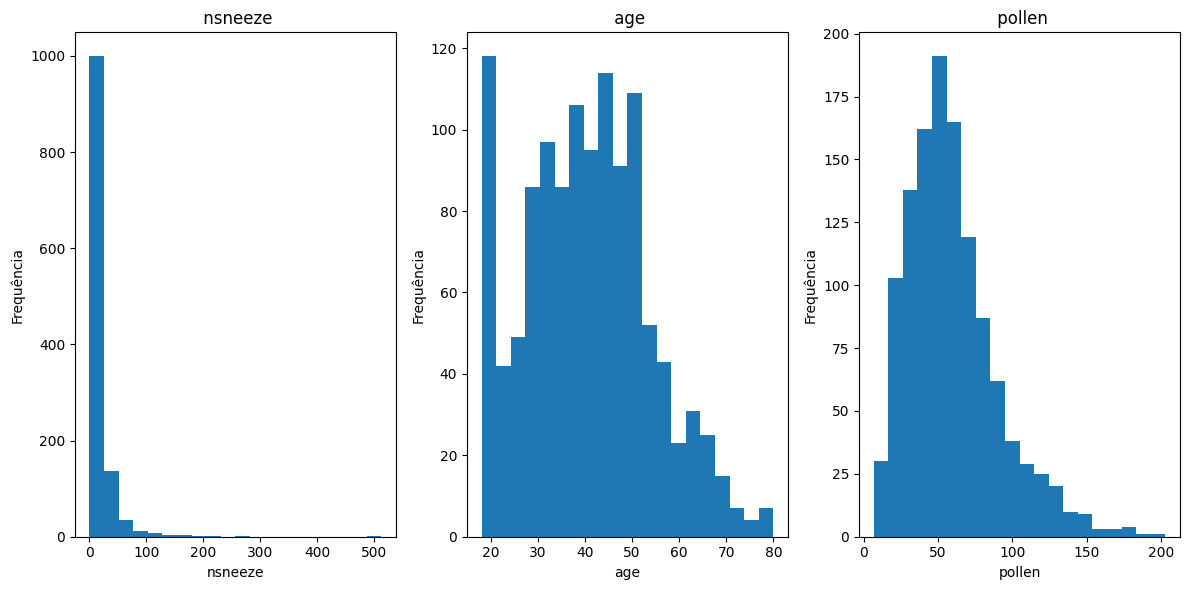

In [5]:
cont_cols = ["nsneeze", "age", "pollen"] # são contunuas

plt.figure(figsize=(12, 6))

for i, col in enumerate(cont_cols, 1):
    plt.subplot(1, 3, i)
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f" {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")

plt.tight_layout()
plt.show()

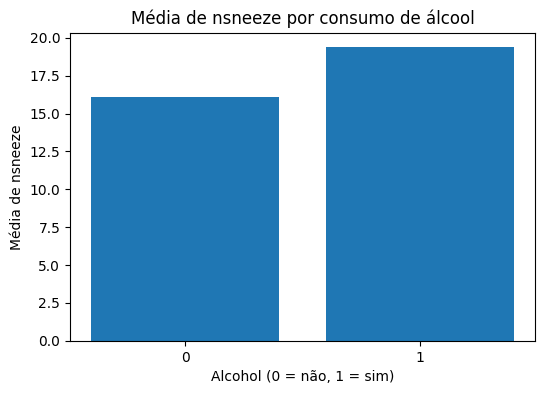

In [6]:
group_means = df.groupby("alcohol")["nsneeze"].mean()

plt.figure(figsize=(6,4))
plt.bar(group_means.index.astype(str), group_means.values)
plt.title("Média de nsneeze por consumo de álcool")
plt.xlabel("Alcohol (0 = não, 1 = sim)")
plt.ylabel("Média de nsneeze")
plt.show()

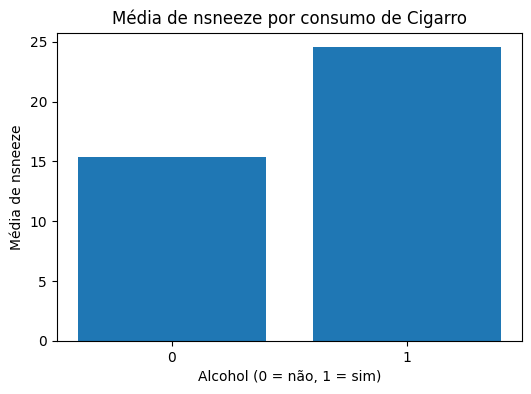

In [7]:
group_means = df.groupby("smoker")["nsneeze"].mean()

plt.figure(figsize=(6,4))
plt.bar(group_means.index.astype(str), group_means.values)
plt.title("Média de nsneeze por consumo de Cigarro")
plt.xlabel("Alcohol (0 = não, 1 = sim)")
plt.ylabel("Média de nsneeze")
plt.show()


Podemos ver que pessoas que fumam e bebem tem média maiores de espirros.

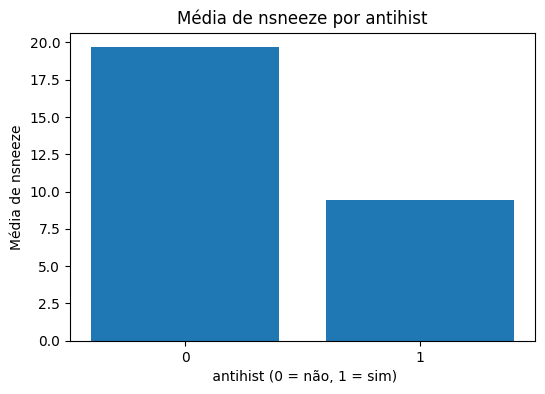

In [8]:
group_means = df.groupby("antihist")["nsneeze"].mean()

plt.figure(figsize=(6,4))
plt.bar(group_means.index.astype(str), group_means.values)
plt.title("Média de nsneeze por antihist")
plt.xlabel(" antihist (0 = não, 1 = sim)")
plt.ylabel("Média de nsneeze")
plt.show()

In [9]:
# Correlação entre variáveis contínuas
corr = df["pollen"].corr(df["nsneeze"])
print("Correlação entre pollen e nsneeze:", corr)

Correlação entre pollen e nsneeze: 0.6518607974560464


In [10]:
corr = df["age"].corr(df["nsneeze"])
print("Correlação entre pollen e nsneeze:", corr)

Correlação entre pollen e nsneeze: -0.04734405857364166


Pelas analíses entendemos que o fato da pesssoas fumar ou beber podem indicar uma mêdia maior de espirros.
Vemos também que pollen é correlacionado positivamento alto com a variável resposta.
Testes estatístico precisam ser feitos para validar essas analíses.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [11]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [12]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [13]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4947.1
Date:                Tue, 25 Nov 2025   Deviance:                       4949.1
Time:                        16:53:33   Pearson chi2:                 5.04e+03
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5560      0.026  

coef alcohol = 0.2191, p-value 0.000,  varia1vel importante
exp(0.2191) ≈ 1.245, podemos entender assim que pessoas que consomem álcool têm 24,5% mais espirros do que quem não consomem.

#

coef antihist = –0.6449, p-value 0.000, varia1vel importante
exp(–0.6449) ≈ 0.525, assim, suários de antihistamínico têm redução de ~47,5% na taxa de espirros, ou seja, metade dos espirros em comparação aos não usuários. Os resultados mostram um efeito negativo e forte.

#

coef smoker = 0.4639, p-value 0.000, varia1vel importante
exp(0.4639) ≈ 1.59.  Fumantes apresentam 59% mais espirros do que não fumantes, assim como alcohol, tem efieto forte e significativo.

#
coef age  = –0.0114, p-value 0.000, varia1vel importante
exp(–0.0114) ≈ 0.9886. Podemos interpretar que a cada ano adicional de idade, o número espirros é reduzido em cerca de 1,1%. Ela tem um efeito negativo pequeno, mas pelo p-value é importate sim para o modelo.


#
coef pollen = 0.0229, p-value 0.000, varia1vel importante
exp(0.0229) ≈ 1.023. Cada aumento de 1 unidade no nível de pólen aumenta os espirros em cerca de 2,3%. Este é o coeficiente com maior z-score, indicando a variável mais influente no modelo.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [14]:
# desvio pelo resíduo
deviance = ajuste_pois.deviance
df_resid = ajuste_pois.df_resid
phi = deviance / df_resid
phi

np.float64(4.14498189596043)

Como phi é maior que 1, temos Indícios de superdispersão.

In [15]:
# métricas para comparação com a binomial negativa
dev_pois = ajuste_pois.deviance
aic_pois = ajuste_pois.aic
print("Poisson - Deviance:", dev_pois)
print("Poisson - AIC:", aic_pois)

Poisson - Deviance: 4949.108383776753
Poisson - AIC: 9906.278039413422


In [16]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

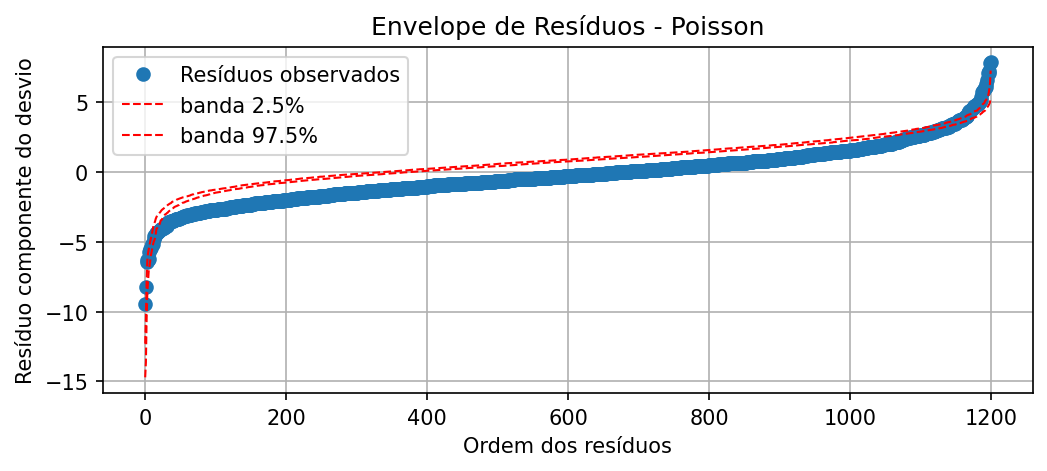

In [17]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

Os pontos azuis estão muito fora da linha vermelha ao longo de todo oo intervalo, ( exeto mas bordas), como era esperado para o poisson, vemos aqui que existe existe forte superdispersão,
confirmando o que vimos no desvio pelo resíduo

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.23

# alpha para sneeze1 a sneeze5 = 0.23, 0.3, 0.25,  0.2, 0.2
# Deveria ter usado um gridsearch?

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

alpha_usado = ajuste_nb.family.alpha
print("Alpha usado no modelo:", alpha_usado)

alpha_est = ajuste_nb.params.iloc[-1]
print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1194
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3849.6
Date:                Tue, 25 Nov 2025   Deviance:                       1180.2
Time:                        16:53:43   Pearson chi2:                 1.13e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9259
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5624      0.062  

In [19]:
dev_nb = ajuste_nb.deviance
aic_nb = ajuste_nb.aic
print("Binomial Negativa - Deviance:", dev_nb)
print("Binomial Negativa - AIC:", aic_nb)

Binomial Negativa - Deviance: 1180.212812367241
Binomial Negativa - AIC: 7711.282894186837


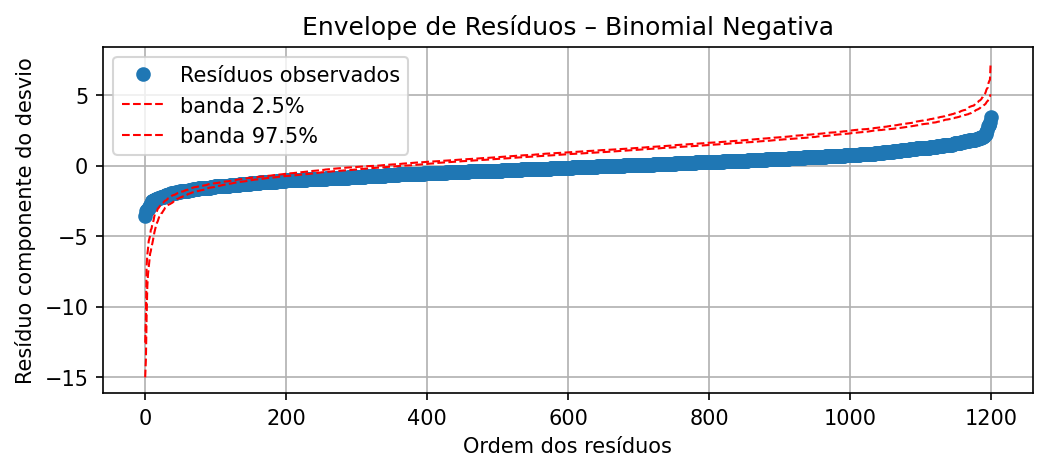

In [20]:
results_nb = ajuste_nb
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results_nb, X, "Envelope de Resíduos – Binomial Negativa")
plt.show()

O modelo mais adequado é bonominal negativo, e isso pode ser visto vendo como o AIC dele é menor em quase 2000 pontos em relação ao poisson. O derivance também tem uma queda alta no modelo binomial negativo.
Pode parecer promissor mais o grafíco de envelope menos que mesmo o desvio diminuindo, o modelo não se ajuda tão bem aos dados, você consegue ver que a medida que o
intervalo aumenta o desvio aumenta tambêm. Ou seja, existe espaço para possível melhoria.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [21]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


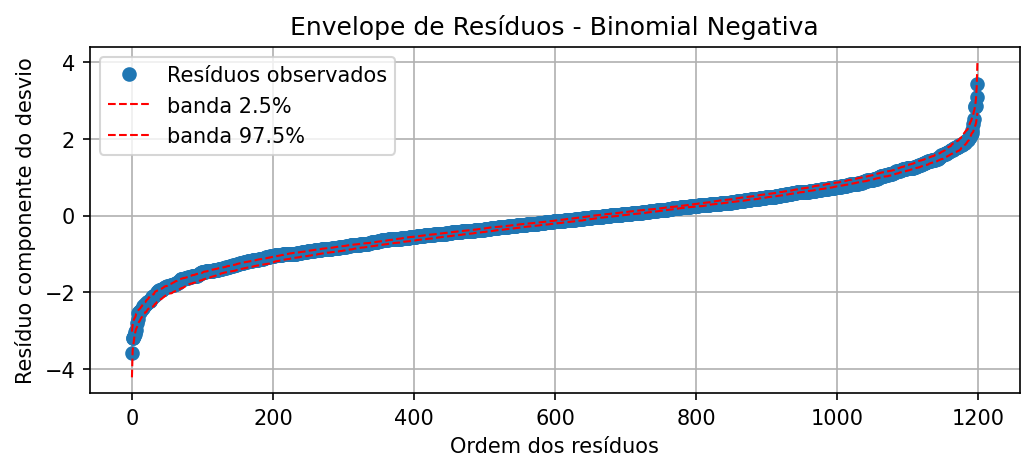

In [22]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [23]:
marginais_nb = ajuste_nb.get_margeff(at='overall')
print(marginais_nb.summary())

         GLM Marginal Effects        
Dep. Variable:                nsneeze
Method:                          dydx
At:                           overall
                      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
C(alcohol)[T.1]      3.6257      0.619      5.861      0.000       2.413       4.838
C(antihist)[T.1]   -11.3852      0.765    -14.883      0.000     -12.885      -9.886
C(smoker)[T.1]       8.3964      0.742     11.311      0.000       6.941       9.851
age                 -0.1854      0.022     -8.380      0.000      -0.229      -0.142
pollen               0.3845      0.016     24.467      0.000       0.354       0.415


Indivíduos que consomem álcool apresentam, em média, cerca de 3,6 espirros a mais por dia em comparação aos que não consomem.
Já o uso de anti-histamínico reduz o número esperado de espirros em aproximadamente 11,4 espirros, em média, comparado a quem não usa o medicamento.
São ambos efeitos fortes pelo p-value ser 0.000.


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [25]:
from sklearn.model_selection import train_test_split

# 80% treino e 20% teste
train_df, test_df = train_test_split(df, test_size=0.20, random_state=123)

In [26]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

# Poisson
pois_train = smf.glm(
    formula=formula,
    data=train_df,
    family=sm.families.Poisson()
).fit()

# Binomial Negativa
nb_train = smf.glm(
    formula=formula,
    data=train_df,
    family=sm.families.NegativeBinomial(alpha=0.23)
).fit()


In [27]:
pred_pois = pois_train.predict(test_df)
pred_nb = nb_train.predict(test_df)

y_test = test_df["nsneeze"]


In [31]:
# EQM  Erro Quadrático Médio ( penaliza mais erros grandes. e crescer / desce rápido)
EQM_pois = np.mean((y_test - pred_pois)**2)
EQM_nb = np.mean((y_test - pred_nb)**2)

# EAM Erro Absoluto Médio  ( penaliza de forma linear)
EAM_pois = np.mean(np.abs(y_test - pred_pois))
EAM_nb = np.mean(np.abs(y_test - pred_nb))

In [32]:

print("EQM Poisson:", EQM_pois)
print("EQM NB:", EQM_nb)
print("EAM Poisson:", EAM_pois)
print("EAM NB:", EAM_nb)

EQM Poisson: 131.25808968019035
EQM NB: 119.66698766985954
EAM Poisson: 6.653071700985791
EAM NB: 6.531310625618889


Sendo o EQM do NB 119.67 < 131.26, que é o do Poisson, e EAM do NB 6.53 < 6.65 que é do Poison, o modleo BN erra menos que o Poison, apesar da diferença não ser grande, ela existe, pois o modelo que teve melhor ajuste também teve melhor capacidade preditiva fora da amostra.
E esse resultado bate com o que vimso de desvio e AIC nos modelos Poisson e NB, no qual o NB também foi melhor.
Logo, o modelo que melhor respresenta a quantidade de espirros é o NB.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [33]:
# Defini como os  valores de baixa e alta concentração colocando o max e mim obtidos no df.describe()
pollen_baixo = 6.576282
pollen_alto = 202.922690

novos_dados = pd.DataFrame({
    "alcohol": [0, 1],
    "antihist": [1, 0],
    "smoker": [0, 1],
    "age": [30, 50],
    "pollen": [pollen_baixo, pollen_alto]
})

predicoes = ajuste_nb.predict(novos_dados)

print("Predição - Indivíduo A:", predicoes.iloc[0])
print("Predição - Indivíduo B:", predicoes.iloc[1])


Predição - Indivíduo A: 2.0480731890095716
Predição - Indivíduo B: 543.9587940178666


Eles tem uma diferença enorme!
Em dia de baixa concentração de pólen, um indivíduo não fumante, que não consome álcool e usa anti-histamínico, teria em média cerca de 2 espirros.
Enquanto uma pessoa num dia de alta concentração de pólen, que combina consumo de álcool, ausência de anti-histamínico, tabagismo e idade mais elevada, apresenta um número esperado de espirros extremamente maior.

#

Isso de deve a fatos que analisamos nesse notebook
- o efeito forte e  crescente do pólen sobre o número de espirros
- o aumento causado por ser fumante
- o impacto ruim do consumo de álcool
- o efeito do anti-histamínico, cuja ausência agrava o quadro ( como podemos ver no quadro de efeitos marginais, onde o dele foi -11,38)